# Business Sales Analysis
This project is an analysis of the sales made by an Electronics Company in 2019.  It tries to gain insights about the data and provides answers to valuable business questions to help make better decisions and increase profits and skyrocket growth.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

In [3]:
pd.reset_option('display.max_rows', 180)

In [4]:
pd.read_csv("./Sales_Data/Sales_April_2019.csv")

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
18378,194090,Google Phone,1,600,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001"
18379,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301"
18380,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016"
18381,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035"


## Merging the 12 Months Sales

In [18]:
sales_data_source = [file for file in os.listdir('./Sales_Data/')]

all_months_sales = pd.DataFrame()

for file in sales_data_source:
    df = pd.read_csv('./Sales_Data/'+file)
    all_months_sales = pd.concat([all_months_sales, df])
  
all_months_sales.to_csv('all_months_sales.csv', index=False)
    

## Importing All_Months_Sales Record

In [19]:
all_months_sales = pd.read_csv('./all_months_sales.csv')
all_months_sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [20]:
nan_df =all_months_sales[all_months_sales.isna().any(axis=1)]
nan_df.shape

(545, 6)

In [21]:
nan_df.head(62)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
17446,NaN,NaN,NaN,NaN,NaN,NaN
17718,NaN,NaN,NaN,NaN,NaN,NaN
18695,NaN,NaN,NaN,NaN,NaN,NaN
19605,NaN,NaN,NaN,NaN,NaN,NaN


## Cleaning up Data

In [22]:
all_months_sales = all_months_sales.dropna(how='all')
all_months_sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Finding and Deleting 'Or'

In [24]:
all_months_sales = all_months_sales[all_months_sales['Order Date'].str[0:2] != 'Or']

In [25]:
all_months_sales['Quantity Ordered'] = pd.to_numeric(all_months_sales['Quantity Ordered'])
all_months_sales['Price Each'] = pd.to_numeric(all_months_sales['Price Each'])
all_months_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


## Augmenting Data with additional columns

### Adding 'Month' column

In [26]:
all_months_sales = all_months_sales.assign(Month = all_months_sales['Order Date'].str[0:2])
all_months_sales['Month'] = all_months_sales['Month'].astype(int)

In [27]:
all_months_sales.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016",9


### Adding an  'Amount' column

In [28]:
all_months_sales = all_months_sales.assign(Amount=all_months_sales['Quantity Ordered'] * all_months_sales['Price Each'])
all_months_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Amount
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [22]:
all_months_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Amount,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4


### Adding a 'City' column

In [29]:
def get_city(city_name):
    return city_name.split(',')[-2]

def get_state(state_name):
    return state_name.split(',')[2].split(' ')[1]

all_months_sales['City'] = all_months_sales['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

In [30]:
all_months_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Amount,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


## Adding an 'Order Hour & Min.' columns

In [32]:
all_months_sales['Order Date'] = pd.to_datetime(all_months_sales['Order Date'])
all_months_sales['Order Hour'] = all_months_sales['Order Date'].dt.hour
all_months_sales['Order Min.'] = all_months_sales['Order Date'].dt.minute

In [34]:
all_months_sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Amount,City,Order Hour,Order Min.
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27
...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA),20,56
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA),16,0
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA),7,39
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA),17,30


## What is the best month for sales? How much was earned?

In [59]:
best_sales = all_months_sales.groupby('Month').sum()
best_sales

,Quantity Ordered,Price Each,Amount,Order Hour,Order Min.
Month,,,,,
1,10903,1811768.38,1822256.73,139485,282440
2,13449,2188884.72,2202022.42,172669,354885
3,17005,2791207.83,2807100.38,218969,447559
4,20558,3367671.02,3390670.24,262259,544186
5,18667,3135125.13,3152606.75,238780,487899
6,15253,2562025.61,2577802.26,195528,402436
7,16072,2632539.56,2647775.76,206169,417349
8,13448,2230345.42,2244467.88,172289,353857
9,13109,2084992.09,2097560.13,168513,341698


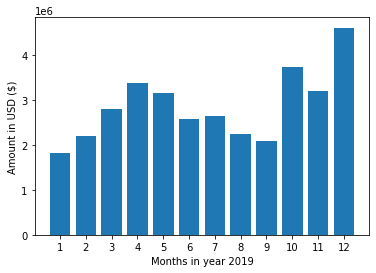

In [36]:
months = range(1, 13)
plt.bar(months, best_sales['Amount'])
plt.xticks(months)
plt.xlabel('Months in year 2019')
plt.ylabel('Amount in USD ($)')
plt.show()

In [ ]:
# My Answer: The best sale was on December and earnings = $4,613,443.34

## What city made the highest purchase?

In [37]:
best_city = all_months_sales.groupby('City').sum()
best_city

,Quantity Ordered,Price Each,Month,Amount,Order Hour,Order Min.
City,,,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58,214264,442932
Austin (TX),11153,1809873.61,69829,1819581.75,141946,289060
Boston (MA),22528,3637409.77,141112,3661642.01,288225,590442
Dallas (TX),16730,2752627.82,104620,2767975.40,214390,435155
Los Angeles (CA),33289,5421435.23,208325,5452570.80,427444,866638
New York City (NY),27932,4635370.83,175741,4664317.43,357696,733598
Portland (ME),2750,447189.25,17144,449758.27,35211,72856
Portland (OR),11303,1860558.22,70621,1870732.34,144421,295533
San Francisco (CA),50239,8211461.74,315520,8262203.91,643265,1319477


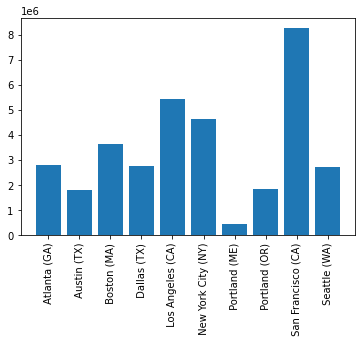

In [38]:
cities = [city for city, data in all_months_sales.groupby('City')]
plt.bar(cities, best_city['Amount'])
plt.xticks(cities, rotation='vertical', size=10)
plt.show()



In [ ]:
# My Answer : The highest purchase was made in San Francisco with a total of 50239 orders

## What time should we display advertisements to maximize likelihood of customer's buying product?

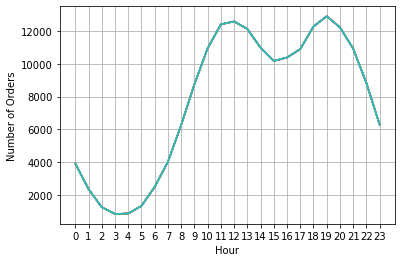

In [39]:
best_hour = [hour for hour, data in all_months_sales.groupby('Order Hour')]

plt.plot(best_hour, all_months_sales.groupby(['Order Hour']).count())
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.xticks(best_hour)
plt.grid()


In [ ]:
# My recommendation is 11am and 7pm (19:00)

## What products are most often sold together?

In [42]:
no_duplicate = all_months_sales[all_months_sales['Order ID'].duplicated(keep=False)]
no_duplicate = no_duplicate.assign(Grouped= no_duplicate.groupby('Order ID')['Product'].transform(lambda x: ','.join(x)))
no_duplicate = no_duplicate[['Order ID', 'Grouped']].drop_duplicates()
no_duplicate.head(10)

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


In [43]:
from itertools import combinations
from collections import Counter

count  = Counter()

for row in no_duplicate['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
   
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [ ]:
# The highest product sold together is iPhone with Lightning Charging Cable

## What product sold the most?

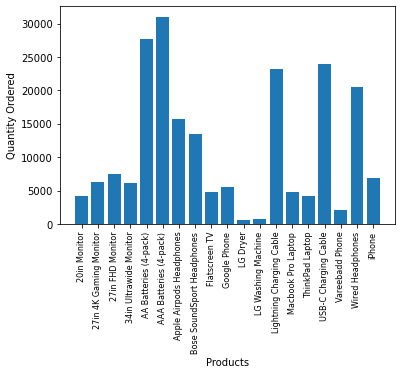

In [46]:
product_list = all_months_sales.groupby('Product')
quantity_ordered = product_list.sum()['Quantity Ordered']

products = [product for product, df in product_list]
plt.bar(products, quantity_ordered)
plt.xlabel('Products')
plt.ylabel('Quantity Ordered')
plt.xticks(products, rotation='vertical', size=8)
plt.show()

In [92]:
# AAA Batteries (4-pack) sold the best

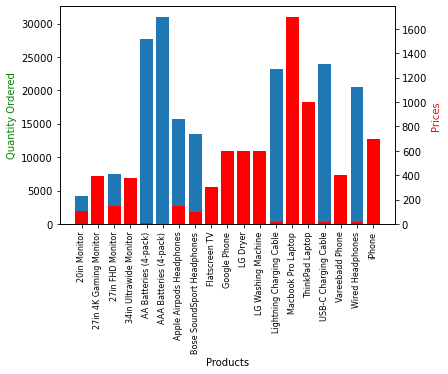

In [53]:
prices  = all_months_sales.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(products, quantity_ordered)
ax2.bar(products, prices, color='r')
ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered', color='g')
ax1.set_xticks(products)
ax2.set_ylabel('Prices', color='r')
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()